In [88]:
#Importing suitable libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
#updating excel file
data = pd.read_excel('Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [12]:
#finding missing or null values
missing_data = data.isnull().sum()
print(missing_data)

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


In [9]:
# IMPUTING VALUES ON THE MISSING VALUES
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(data[['Movement off the Ball']])
data[['Movement off the Ball']] = imputer.transform(data[['Movement off the Ball']])

In [10]:
# IMPUTING VALUES ON THE MISSING VALUES
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(data[['Penalty Success Rate']])
data[['Penalty Success Rate']] = imputer.transform(data[['Penalty Success Rate']])

In [11]:
# IMPUTING VALUES ON THE MISSING VALUES
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(data[['Big Game Performance']])
data[['Big Game Performance']] = imputer.transform(data[['Big Game Performance']])

In [56]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [14]:
#finding duplicates
duplicates = data.duplicated()
data[duplicates]

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct


In [15]:
data.describe()

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,15.036603,8.095660,25.759392,0.603319,0.199424,0.702133,69.790151,59.810879,19.529831,39.954865,6.928509,0.743628,0.795525,7.012619,8.064249
std,144.481833,4.898554,2.933487,7.071724,0.098407,0.047978,0.100108,10.337631,10.167912,4.958031,9.921254,1.936706,0.103619,0.102535,2.100270,2.068334
min,1.000000,0.000000,0.000000,4.726212,0.305961,0.049024,0.400886,40.705513,35.067292,4.961838,8.232962,2.231386,0.460049,0.529246,0.557967,0.623269
25%,125.750000,11.498463,6.214125,20.782993,0.538806,0.166963,0.637285,62.695399,52.425012,16.395836,33.458187,5.685446,0.675834,0.723933,5.656504,6.615688
50%,250.500000,15.063986,8.085595,25.838641,0.599109,0.199842,0.700354,69.790151,60.075293,19.741772,39.978322,6.918813,0.745519,0.795525,6.991318,8.016586
75%,375.250000,18.183916,9.953727,30.283169,0.669977,0.233459,0.763227,76.933428,66.033512,22.856931,46.693579,8.133822,0.812646,0.869536,8.431703,9.452531
max,500.000000,34.263657,15.897146,43.211782,0.919311,0.355496,1.000000,98.684031,92.430930,34.073272,71.129102,12.871316,1.000000,1.000000,13.235362,13.730424


In [16]:
Foots = data['Footedness'].value_counts()
Foots

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [17]:
perc_foots = Foots/len(data['Footedness'])*100
perc_foots

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

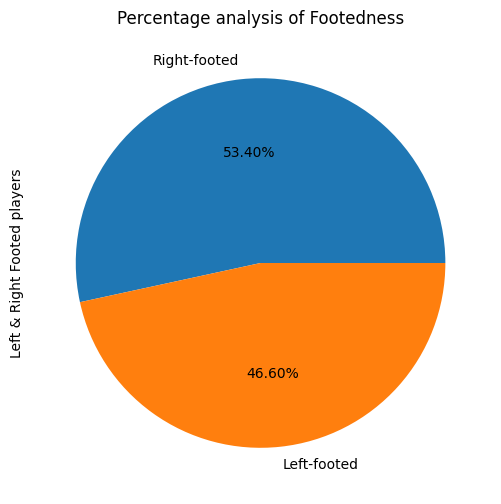

In [18]:
plt.figure(figsize=(8,6))
perc_foots.plot(kind='pie',autopct = '%1.2f%%')
plt.title('Percentage analysis of Footedness')
plt.ylabel('Left & Right Footed players')
plt.show()

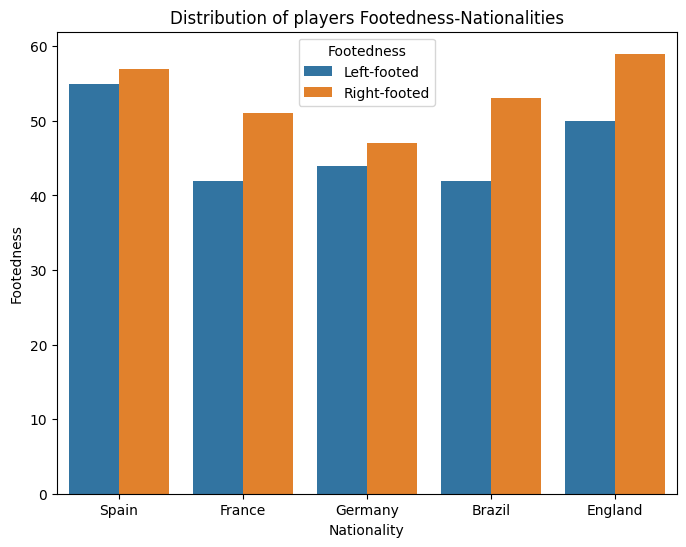

In [19]:
#Distribution of players on the basis of nationalities and Footedness
plt.figure(figsize=(8,6))
sns.countplot(x = 'Nationality',hue ='Footedness',data = data)
plt.title('Distribution of players Footedness-Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [20]:
Gr = data.groupby('Nationality')['Footedness'].value_counts()
Gr

Nationality  Footedness  
Brazil       Right-footed    53
             Left-footed     42
England      Right-footed    59
             Left-footed     50
France       Right-footed    51
             Left-footed     42
Germany      Right-footed    47
             Left-footed     44
Spain        Right-footed    57
             Left-footed     55
Name: count, dtype: int64

In [21]:
# Determining Highest number of Goal Scored by Every nation
Grouped = data.groupby('Nationality')['Goals Scored'].mean()
Grouped

Nationality
Brazil     15.804927
England    14.465756
France     14.900827
Germany    14.860242
Spain      15.196491
Name: Goals Scored, dtype: float64

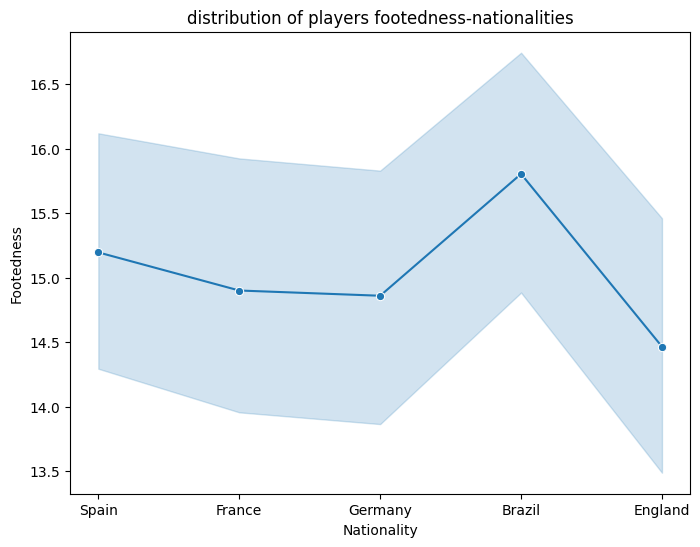

In [22]:
# Graph of Highest number of Goal Scored by Every nation
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Nationality', y ='Goals Scored',data = data, marker = 'o')
plt.title('distribution of players footedness-nationalities')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [80]:
#average conversion rate for players based on their footedness.
Grouped = data.groupby('Footedness')['Conversion Rate'].mean()
Grouped

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

In [23]:
#checking the normal distribution of data performing shapiro-wilk-test
from scipy.stats import shapiro
num_col = ['Consistency','Hold-up Play']
shapiro_results = {}

for column in num_col:
    stat,p_value = shapiro(data[column])
    shapiro_results[column] = round(p_value,3)
shapiro_results

{'Consistency': np.float64(0.451), 'Hold-up Play': np.float64(0.325)}

In [24]:
#after the normal distribution confirmation performing 'ANOVA' To determine whether there's a significant difference 
#in consistency rates among strikers from various nationalities
from scipy import stats
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
Spain = data.query('Nationality == "Spain"')['Consistency']
t_statistic,p_value = stats.f_oneway(Brazil,England,France,Germany,Spain)
print("p_value:", p_value)
if p_value < 0.05:
    print('There is a significant difference in consistency rates among nationalities.')    
else:
    print('There is no significant difference in consistency rates among nationalities.')

p_value: 0.19278675901599154
There is no significant difference in consistency rates among nationalities.


In [25]:
#Assumption of Homogenity of Vaiance
from scipy.stats import levene
Grouped = data.groupby('Nationality')['Consistency'] # Group data by nationality
groups = [group for name , group in Grouped]  # Extract individual groups
# Apply Levene’s test
stat, p = levene(*groups)
print("Levene’s test p-value:", p)

Levene’s test p-value: 0.8083990350934653


In [26]:
#Significant correlation between data
correal = data[['Consistency','Hold-up Play']].corr()
correal

,Consistency,Hold-up Play
Consistency,1.000000,0.145044
Hold-up Play,0.145044,1.000000


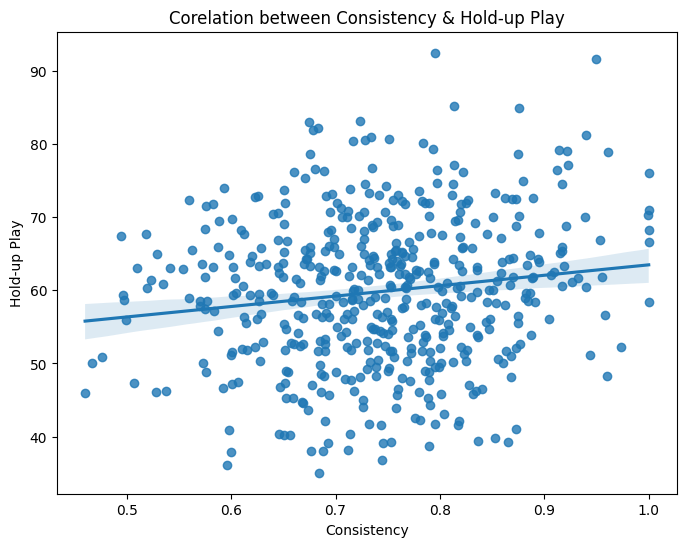

In [27]:
#plottting significant relation between two numeric data with trend line
plt.figure(figsize=(8,6))
sns.regplot(x='Consistency',y='Hold-up Play', data = data)
plt.title('Corelation between Consistency & Hold-up Play')
plt.xlabel('Consistency')
plt.ylabel('Hold-up Play')
plt.show()

In [120]:
#Performing linear regression to determine the significant difference between two variables checking dependecies.
X = data['Hold-up Play']
Y = data['Consistency']
X_reg = sm.add_constant(X)
model = sm.OLS(Y,X_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.70
Date:                Fri, 13 Jun 2025   Prob (F-statistic):            0.00114
Time:                        11:28:20   Log-Likelihood:                 429.86
No. Observations:                 500   AIC:                            -855.7
Df Residuals:                     498   BIC:                            -847.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6552      0.027     23.903   

In [28]:
#Fetching columns
data.columns

Index(['Striker_ID', 'Nationality', 'Footedness', 'Marital Status',
       'Goals Scored', 'Assists', 'Shots on Target', 'Shot Accuracy',
       'Conversion Rate', 'Dribbling Success', 'Movement off the Ball',
       'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
       'Big Game Performance', 'Consistency', 'Penalty Success Rate',
       'Impact on Team Performance', 'Off-field Conduct'],
      dtype='object')

In [29]:
data['Total contribution'] = (data['Goals Scored'] + data['Goals Scored']+ data['Assists']+  data['Shots on Target'] + data['Dribbling Success'] 
                                     + data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency'])
round(data.head(),2)

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution
0,1,Spain,Left-footed,No,17.48,10.78,34.80,0.68,0.17,0.76,50.92,71.81,15.68,30.41,6.15,0.82,0.92,8.57,11.45,134.37
1,2,France,Left-footed,Yes,14.31,13.73,31.47,0.54,0.19,0.80,61.40,53.73,19.84,26.47,6.09,0.80,0.68,3.44,8.24,127.83
2,3,Germany,Left-footed,No,18.24,3.80,25.42,0.52,0.16,0.67,65.86,60.45,20.09,24.16,3.41,0.77,0.84,8.43,9.51,114.79
3,4,France,Right-footed,No,22.62,9.69,20.47,0.60,0.18,0.64,88.88,60.51,22.36,44.13,6.34,0.61,0.66,6.53,8.20,149.47
4,5,France,Left-footed,Yes,13.83,6.05,29.89,0.58,0.11,0.59,75.57,54.98,13.17,37.86,8.47,0.70,0.91,8.41,6.67,124.38


In [30]:
#Converting categorical into numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Footedness']= encoder.fit_transform(data['Footedness'])

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Marital Status']= encoder.fit_transform(data['Marital Status'])

In [32]:
dummies = pd.get_dummies(data[['Nationality']], dtype=int)
data = pd.concat([data,dummies],axis = 1)

In [136]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Total contribution
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,...,0.820314,0.922727,8.570370,11.451388,0,0,0,0,1,134.365766
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,...,0.803321,0.678984,3.444638,8.243689,0,0,1,0,0,127.830249
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,...,0.766540,0.843858,8.429491,9.506835,0,0,0,1,0,114.794919
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,...,0.611798,0.662997,6.532552,8.199653,0,0,1,0,0,149.474184
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,...,0.701638,0.906538,8.414915,6.665333,0,0,1,0,0,124.377914


In [33]:
data.columns

Index(['Striker_ID', 'Nationality', 'Footedness', 'Marital Status',
       'Goals Scored', 'Assists', 'Shots on Target', 'Shot Accuracy',
       'Conversion Rate', 'Dribbling Success', 'Movement off the Ball',
       'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
       'Big Game Performance', 'Consistency', 'Penalty Success Rate',
       'Impact on Team Performance', 'Off-field Conduct', 'Total contribution',
       'Nationality_Brazil', 'Nationality_England', 'Nationality_France',
       'Nationality_Germany', 'Nationality_Spain'],
      dtype='object')

In [34]:
#creating sub Dataframe
x_reg = data.drop(['Striker_ID','Nationality','Goals Scored','Footedness','Marital Status'], axis = 1)
y_reg = data['Goals Scored']

In [35]:
x_reg

,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,134.365766,0,0,0,0,1
1,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,127.830249,0,0,1,0,0
2,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,114.794919,0,0,0,1,0
3,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,149.474184,0,0,1,0,0
4,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,124.377914,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.156699,39.042650,0.707015,0.240660,0.707748,89.351540,60.284576,28.386885,39.510350,4.448635,0.767147,0.770213,5.999478,12.419711,155.409215,0,1,0,0,0
496,13.393060,39.430525,0.597348,0.186052,0.725775,78.155010,39.221882,15.974141,47.114106,6.742907,0.865265,0.876903,5.967767,8.653989,143.873318,0,0,0,1,0
497,9.922529,33.458564,0.511813,0.186012,0.575824,69.519115,56.797022,25.384241,71.129102,5.696650,0.628260,0.747261,11.249112,6.329751,174.891781,0,1,0,0,0
498,6.286463,32.168438,0.583693,0.239519,0.733418,68.168495,76.433782,9.151613,48.080362,2.611235,0.796795,0.799489,1.452370,11.305826,121.072141,0,1,0,0,0


In [36]:
# clustering data analysis
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x_reg)
    wcss_value = kmeans.inertia_
    wcss.append(wcss_value)

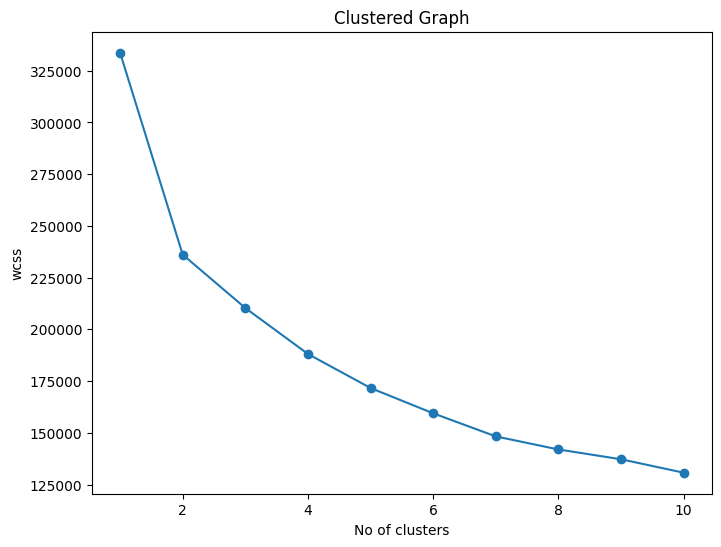

In [40]:
plt.figure(figsize = (8,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Clustered Graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
#If x_reg contains player performance metrics (like goals, assists, ratings), the clustering might separate performers
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_reg)
labels = kmeans.labels_
labels

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [48]:
data['Clusters'] = labels
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters,Strikers_Type
0,1,Spain,0,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,...,8.570370,11.451388,134.365766,0,0,0,0,1,1,Best Strikers
1,2,France,0,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,...,3.444638,8.243689,127.830249,0,0,1,0,0,0,Regular Strikers
2,3,Germany,0,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,...,8.429491,9.506835,114.794919,0,0,0,1,0,0,Regular Strikers
3,4,France,1,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,...,6.532552,8.199653,149.474184,0,0,1,0,0,1,Best Strikers
4,5,France,0,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,...,8.414915,6.665333,124.377914,0,0,1,0,0,0,Regular Strikers


In [49]:
data.groupby('Clusters')['Total contribution'].mean()

Clusters
0    117.587761
1    142.853707
Name: Total contribution, dtype: float64

In [68]:
data['Strikers_Type'] = pd.cut(
    data['Clusters'],
    bins=[-1, 0.5, 1.5],  # intervals to capture cluster 0 and 1
    labels=['Regular Strikers', 'Best Strikers'],
    include_lowest=True
)
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters,Strikers_Type
0,1,Spain,0,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,...,8.570370,11.451388,134.365766,0,0,0,0,1,1,Best Strikers
1,2,France,0,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,...,3.444638,8.243689,127.830249,0,0,1,0,0,0,Regular Strikers
2,3,Germany,0,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,...,8.429491,9.506835,114.794919,0,0,0,1,0,0,Regular Strikers
3,4,France,1,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,...,6.532552,8.199653,149.474184,0,0,1,0,0,1,Best Strikers
4,5,France,0,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,...,8.414915,6.665333,124.377914,0,0,1,0,0,0,Regular Strikers


In [51]:
x_class = data.drop(['Striker_ID','Nationality','Footedness' ,'Marital Status','Strikers_Type'],axis =1)
y_class = data['Strikers_Type']

In [52]:
x_class

,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters
0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,...,0.922727,8.570370,11.451388,134.365766,0,0,0,0,1,1
1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,...,0.678984,3.444638,8.243689,127.830249,0,0,1,0,0,0
2,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,...,0.843858,8.429491,9.506835,114.794919,0,0,0,1,0,0
3,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,...,0.662997,6.532552,8.199653,149.474184,0,0,1,0,0,1
4,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,...,0.906538,8.414915,6.665333,124.377914,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,17.694550,7.156699,39.042650,0.707015,0.240660,0.707748,89.351540,60.284576,28.386885,39.510350,...,0.770213,5.999478,12.419711,155.409215,0,1,0,0,0,1
496,9.813769,13.393060,39.430525,0.597348,0.186052,0.725775,78.155010,39.221882,15.974141,47.114106,...,0.876903,5.967767,8.653989,143.873318,0,0,0,1,0,1
497,14.048307,9.922529,33.458564,0.511813,0.186012,0.575824,69.519115,56.797022,25.384241,71.129102,...,0.747261,11.249112,6.329751,174.891781,0,1,0,0,0,1
498,10.621909,6.286463,32.168438,0.583693,0.239519,0.733418,68.168495,76.433782,9.151613,48.080362,...,0.799489,1.452370,11.305826,121.072141,0,1,0,0,0,0


In [53]:
y_class

0         Best Strikers
1      Regular Strikers
2      Regular Strikers
3         Best Strikers
4      Regular Strikers
             ...       
495       Best Strikers
496       Best Strikers
497       Best Strikers
498    Regular Strikers
499    Regular Strikers
Name: Strikers_Type, Length: 500, dtype: category
Categories (2, object): ['Regular Strikers' < 'Best Strikers']

In [54]:
#scaling data with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_class = scaler.fit_transform(x_class)

In [55]:
scaled_x_class

array([[ 0.50002889,  0.91548368,  1.27905805, ..., -0.47169258,
         1.86125917,  0.88281336],
       [-0.14874861,  1.92202334,  0.80868051, ..., -0.47169258,
        -0.53727069, -1.13274226],
       [ 0.65428418, -1.46435269, -0.04840709, ...,  2.12002488,
        -0.53727069, -1.13274226],
       ...,
       [-0.20195464,  0.6233872 ,  1.0898166 , ..., -0.47169258,
        -0.53727069,  0.88281336],
       [-0.90212639, -0.61735685,  0.90719947, ..., -0.47169258,
        -0.53727069, -1.13274226],
       [-1.4203297 ,  0.55350951,  0.47961291, ..., -0.47169258,
        -0.53727069, -1.13274226]], shape=(500, 22))

In [56]:
#scaling data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
scaled_x_class_2 = (scaler_2.fit_transform(x_class)).round()

In [57]:
scaled_x_class_2

array([[1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(500, 22))

In [58]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_class_train , x_class_test ,y_class_train, y_class_test = train_test_split(scaled_x_class,y_class,test_size = 0.2, random_state = 42)

In [59]:
y_class_train.shape

(400,)

In [60]:
#logistic regression model to predict striker types
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()
model.fit(x_class_train, y_class_train)
y_pred = model.predict(x_class_test)
accuracy = accuracy_score(y_class_test,y_pred)
print("accuracy: " , accuracy*100,'%')

accuracy:  100.0 %


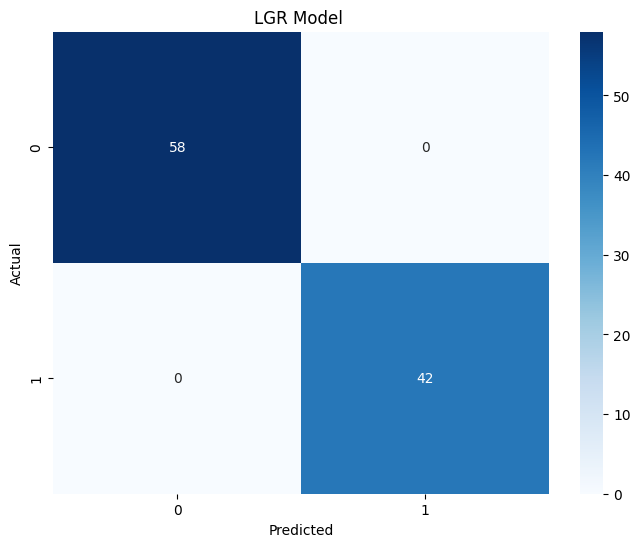

In [61]:
conf_matrix = confusion_matrix(y_class_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot= True, fmt ="d", cmap = "Blues")
plt.title('LGR Model ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()